# INCOME PREDICTION 

RISHANA SHERIN T

ENTRI ELEVATE

### OVERVIEW OF PROBLEM STATEMENT:

The dataset consists of 42 columns and 42,285 rows. It contains both categorical and numerical features related to demographics, employment, and income.

### OBJECTIVE:

The goal of this analysis is to explore and process the dataset to derive meaningful insights and build a predictive model.The focus is to predict income levels or understanding employment trends based on demographic and occupational attributes.

### DATA DESCRIPTION:

Source: UCI machine learning repository

-Numerical Columns (e.g., Age, Occupation Code, Capital Gains, Weeks Worked in Year)

-Categorical Columns (e.g., Class of Worker, Education, Race, Marital Status, Sex, Citizenship)

-Potential Target Variable: The column labeled "income"is the target for classification.

## DATA COLLECTION:

In [1]:
import pandas as pd
df = pd.read_csv('output_file.csv')

## DATA PREPROCESSING:

In [2]:
column_names = [
    'age', 'class of worker', 'industry code', 'occupation code', 'education', 'enrolled in edu last week', 
    'marital status', 'major industry code', 'major occupation code', 'race', 'hispanic origin', 'sex', 
    'member of a labor union', 'reason for unemployment', 'full or part time employment stat', 'capital gains', 
    'capital losses', 'dividends from stocks', 'tax filer status', 'region of previous residence', 
    'state of previous residence', 'detailed household and family stat', 
    'detailed household summary in household', 'instance weight', 'migration code-change in msa', 
    'migration code-change in reg', 'migration code-move within reg', 'live in this house 1 year ago', 
    'migration prev res in sunbelt', 'num persons worked for employer', 'family members under 18', 
    'country of birth father', 'country of birth mother', 'country of birth self', 'citizenship', 
    'own business or self employed', "fill inc questionaire for veteran's admin", 'veterans benefits', 
    'weeks worked in year', 'income', 'wage per hour', 'year'
]

df.columns = column_names

# Save the updated file
updated_file_path = "your_output_file.csv"  # Replace with desired output file path
df.to_csv(updated_file_path, index=False)

print(f"Updated file saved as: {updated_file_path}")

Updated file saved as: your_output_file.csv


In [3]:
print("Dataset Info:")
df.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42284 entries, 0 to 42283
Data columns (total 42 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   age                                        42284 non-null  int64  
 1   class of worker                            42284 non-null  object 
 2   industry code                              42284 non-null  int64  
 3   occupation code                            42284 non-null  int64  
 4   education                                  42284 non-null  object 
 5   enrolled in edu last week                  42284 non-null  int64  
 6   marital status                             42284 non-null  object 
 7   major industry code                        42284 non-null  object 
 8   major occupation code                      42284 non-null  object 
 9   race                                       42284 non-null  object 
 10  hispanic

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [19]:
# Display basic info
print("Dataset Info:")
df.info()

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42284 entries, 0 to 42283
Data columns (total 42 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   age                                        42284 non-null  int64  
 1   class of worker                            42284 non-null  object 
 2   industry code                              42284 non-null  int64  
 3   occupation code                            42284 non-null  int64  
 4   education                                  42284 non-null  object 
 5   enrolled in edu last week                  42284 non-null  int64  
 6   marital status                             42284 non-null  object 
 7   major industry code                        42284 non-null  object 
 8   major occupation code                      42284 non-null  object 
 9   race                                       42284 non-null  object 
 10  hispanic

In [6]:
# Summary statistics
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
                age  industry code  occupation code  \
count  42284.000000   42284.000000     42284.000000   
mean      34.577405      15.430044        11.352663   
std       22.319267      18.081242        14.460405   
min        0.000000       0.000000         0.000000   
25%       15.000000       0.000000         0.000000   
50%       33.000000       0.000000         0.000000   
75%       50.000000      33.000000        26.000000   
max       90.000000      51.000000        46.000000   

       enrolled in edu last week  capital losses  dividends from stocks  \
count               42284.000000    42284.000000           42284.000000   
mean                   56.471053      421.510193              37.074756   
std                   285.675556     4436.945969             272.355930   
min                     0.000000        0.000000               0.000000   
25%                     0.000000        0.000000               0.000000   
50%                     0.000000 

In [7]:
# Check for unique values in categorical columns
print("\nUnique Values in Each Column:")
for col in df.select_dtypes(include=['object']).columns:
    print(f"{col}: {df[col].nunique()} unique values")


Unique Values in Each Column:
class of worker: 9 unique values
education: 17 unique values
marital status: 3 unique values
major industry code: 7 unique values
major occupation code: 24 unique values
race: 15 unique values
hispanic origin: 5 unique values
sex: 10 unique values
member of a labor union: 2 unique values
reason for unemployment: 3 unique values
full or part time employment stat: 6 unique values
capital gains: 8 unique values
region of previous residence: 6 unique values
state of previous residence: 6 unique values
detailed household and family stat: 51 unique values
detailed household summary in household: 33 unique values
instance weight: 8 unique values
migration code-change in reg: 10 unique values
migration code-move within reg: 9 unique values
live in this house 1 year ago: 10 unique values
migration prev res in sunbelt: 3 unique values
num persons worked for employer: 4 unique values
country of birth father: 5 unique values
country of birth mother: 43 unique values


In [8]:
# Detect outliers using IQR method
print("\nOutliers Detection using IQR:")
def detect_outliers(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()
    return outliers

outliers = detect_outliers(df.select_dtypes(include=['number']))
print(outliers)


Outliers Detection using IQR:
age                                              0
industry code                                    0
occupation code                                  0
enrolled in edu last week                     2395
capital losses                                1632
dividends from stocks                          819
tax filer status                              4518
migration code-change in msa                  1315
family members under 18                          0
fill inc questionaire for veteran's admin     4016
weeks worked in year                         10420
income                                           0
wage per hour                                    0
dtype: int64


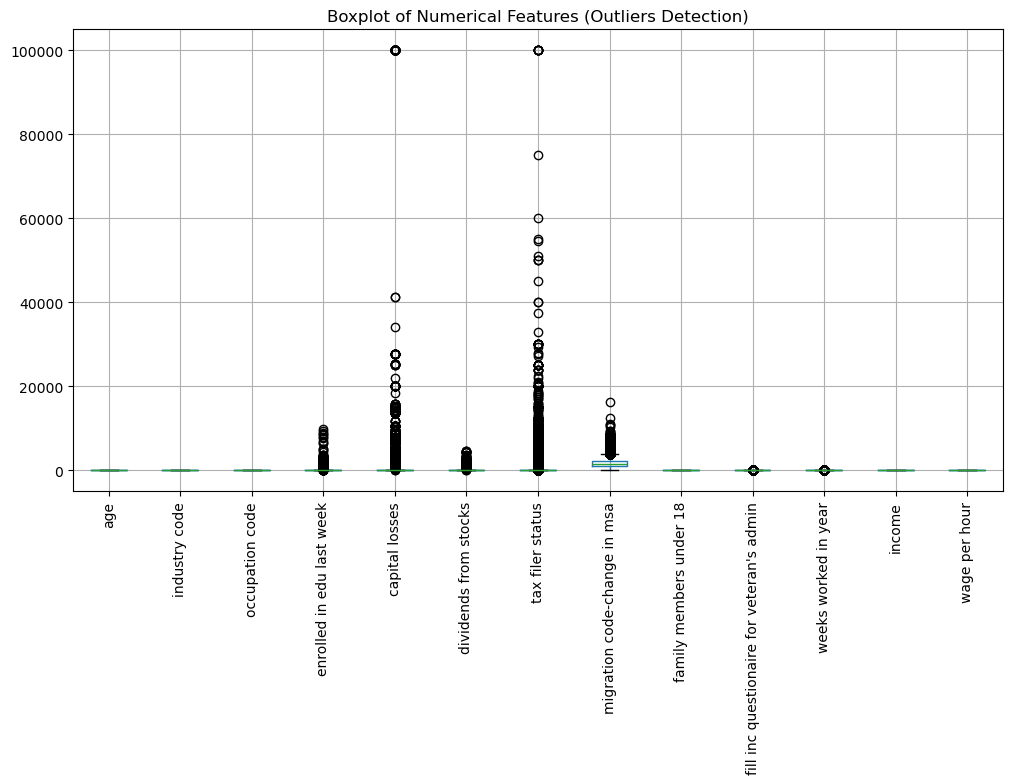

In [9]:
# Boxplots to visualize outliers
plt.figure(figsize=(12, 6))
df.select_dtypes(include=['number']).boxplot(rot=90)
plt.title("Boxplot of Numerical Features (Outliers Detection)")
plt.show()

In [13]:
# Capping outliers using IQR method
def cap_outliers(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df.clip(lower=lower_bound, upper=upper_bound, axis=1)

df_numeric = df.select_dtypes(include=['number'])
df_numeric = cap_outliers(df_numeric)
print("\nOutliers capped using IQR method. New dataset shape:", df_numeric.shape)



Outliers capped using IQR method. New dataset shape: (42284, 13)


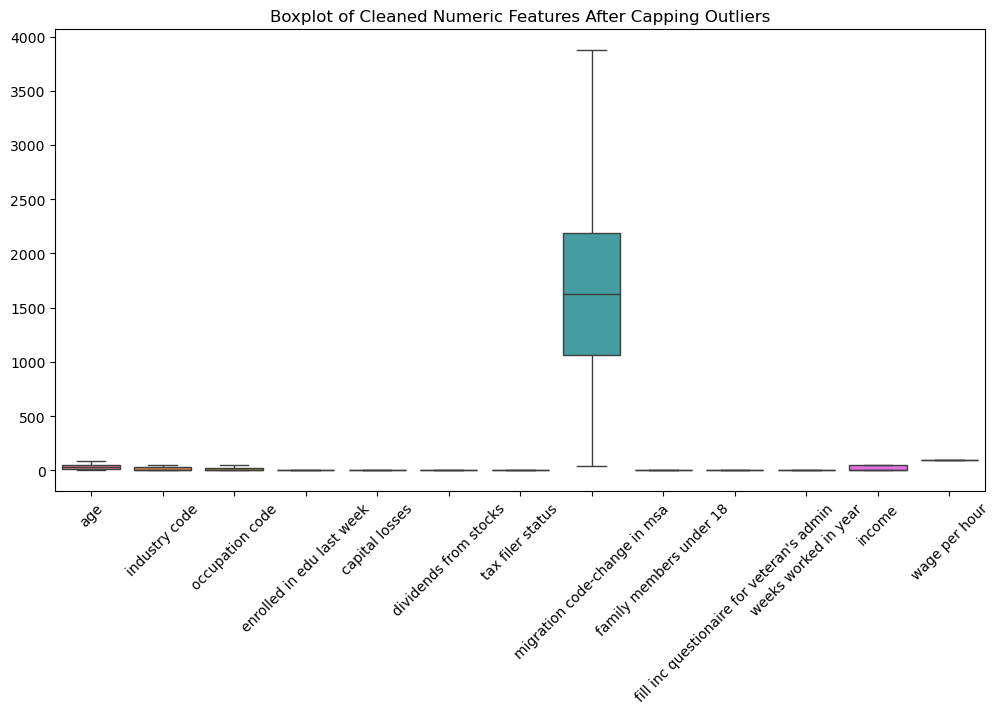

In [16]:
# Boxplots to visualize the cleaned dataset after capping outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_numeric)
plt.xticks(rotation=45)
plt.title("Boxplot of Cleaned Numeric Features After Capping Outliers")
plt.show()


In [22]:
# Compute skewness and remove it using log transformation
def remove_skewness(df):
    skewed_cols = df.skew().abs() > 0.5
    df[skewed_cols.index] = df[skewed_cols.index].apply(lambda x: np.log1p(x) if skewed_cols.loc[x.name] else x)
    return df

df_numeric = remove_skewness(df_numeric)

In [ ]:
# Compute skewness after transformation
print("\nSkewness of Numerical Features (After Transformation):")
print(df_numeric.skew())

## EXPLORATORY DATA ANALYSIS:

The dataset contains a mix of numerical and categorical variables.
Some numerical columns, such as capital losses, dividends from stocks, and tax filer status, have extreme values, suggesting potential outliers.
Age ranges from 0 to 90, with a mean of 34 years.

In [ ]:
# Plot histograms for numerical features
df.hist(figsize=(12, 8), bins=30)
plt.suptitle("Histograms of Numerical Features")
plt.show()

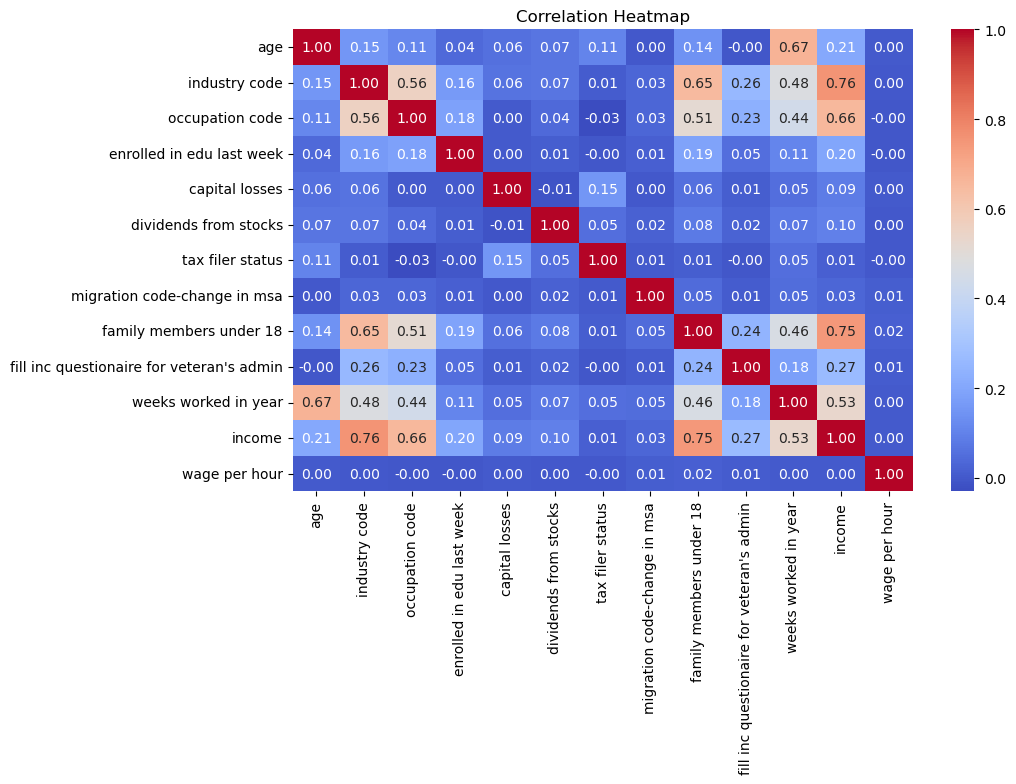

In [127]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
df_numeric = df.select_dtypes(include=['number']).dropna()
if not df_numeric.empty:
    sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', fmt='.2f')
    plt.title("Correlation Heatmap")
    plt.show()
else:
    print("No numeric columns available for correlation heatmap.")


In [ ]:
# Pairplot for numerical features (sampled to avoid performance issues if dataset is large)
sns.pairplot(df.sample(min(500, len(df))))
plt.show()

In [130]:
print("EDA Completed!")

EDA Completed!


In [23]:
# Ensure 'income' column exists and drop missing values in both X and y
df = df.dropna(subset=['income'])

In [39]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Encode categorical features
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le

In [25]:
from sklearn.feature_selection import SelectKBest, f_classif
# Feature selection using SelectKBest
if 'income' in df.columns:
    X = df_numeric.drop(columns=['income'], errors='ignore')
    y = df['income']
    
    # Remove constant features
    X = X.loc[:, X.nunique() > 1]
    
    # Ensure X and y have the same indices
    X, y = X.align(y, join='inner', axis=0)
    
    selector = SelectKBest(score_func=f_classif, k=min(5, X.shape[1]))  # Adjust k to available features
    X_new = selector.fit_transform(X, y)
    selected_features = X.columns[selector.get_support()]
    print("\nTop selected features:", selected_features.tolist())
else:
    print("\nFeature selection skipped: 'income' column not found.")



Top selected features: ['age', 'industry code', 'occupation code', 'migration code-change in msa', 'family members under 18']


In [27]:
from sklearn.model_selection import train_test_split, GridSearchCV
# Splitting dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("\nDataset split into training and testing sets.")
print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)


Dataset split into training and testing sets.
Training set size: (33826, 6)
Testing set size: (8457, 6)


In [37]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler, MinMaxScaler
# Feature Scaling
scaler = StandardScaler() 
numerical_cols = df.select_dtypes(include=['number']).columns
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
